In [34]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import SGD, Adam
import matplotlib.pyplot as plt
from IPython.display import Image
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.utils import normalize
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('data/diabetes.csv')

In [21]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [22]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
df.info()

#df['~~'] = df['~~'].astype('int') 하면 자료형 바뀜

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
x_data=df.iloc[:,0:8]

In [25]:
y_data=df['Outcome']
y_data.shape

(768,)

In [26]:
from sklearn.preprocessing import StandardScaler
x_std = StandardScaler().fit_transform(x_data)

In [27]:
y_std=np.array(y_data)

In [28]:
x_std

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [29]:
y_std

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std, y_std, test_size = 0.2, random_state=0)

In [38]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [40]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 400)
hist=model.fit(x_train, y_train)

In [39]:
#이렇게해도됨
'''model=Sequential()
model.add(Dense(1,input_shape=(x_train.shape[1],),activation='sigmoid'))
model.compile(optimizer=SGD(learning_rate=0.01),loss='binary_crossentropy',metrics=['accuracy'])
hist=model.fit(x_train,y_train,epochs=500,validation_split=0.2,verbose=1)'''

In [43]:
y_pred=model.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      dtype=int64)

In [44]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [46]:
model.score(x_test,y_test)

0.8246753246753247

In [49]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [50]:
confusion_matrix(y_test, y_pred)

array([[98,  9],
       [18, 29]], dtype=int64)

In [64]:
accuracy_score(y_test,y_pred)

0.8246753246753247

RFE(Recursive Feature Elimination)

In [127]:
from sklearn.feature_selection import RFE

In [128]:
model = LogisticRegression(solver='lbfgs', max_iter=500)
rfe = RFE(model, 5, verbose=1)
rfe = rfe.fit(x_data, y_data)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


C:\ProgramData\Anaconda3\envs\tens_2\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=5 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


In [129]:
rfe.support_

array([ True,  True, False, False, False,  True,  True,  True])

In [144]:
xx_data = x_data[x_data.columns[rfe.support_]]

In [139]:
xx_std = StandardScaler().fit_transform(xx_data)

In [140]:
xx_std.shape, y_std.shape

((768, 5), (768,))

In [141]:
x_train, x_test, y_train, y_test = train_test_split(xx_std, y_std, test_size = 0.2, random_state=0)

In [142]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
hist=model.fit(x_train, y_train)

In [143]:
y_pred=model.predict(x_test)
model.score(x_test,y_test)

0.8051948051948052

Accuracy, F1-Score, P, R, AUC_ROC curve

In [173]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [175]:
model = LogisticRegression(solver= 'lbfgs', max_iter = 500)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)

In [177]:
y_predict_prob = model.predict_proba(x_test)[:, 1]

In [178]:
[fpr, tpr, thr] = roc_curve(y_test, y_predict_prob)

In [179]:
print('Accuracy: ', accuracy_score(y_test, y_predict))
print('log loss: ', log_loss(y_test, y_predict_prob))
print('auc: ', auc(fpr, tpr))

Accuracy:  0.8051948051948052
log loss:  0.4319458703547943
auc:  0.8697554185722808


In [180]:
idx = np.min(np.where(tpr>0.95))
idx

31

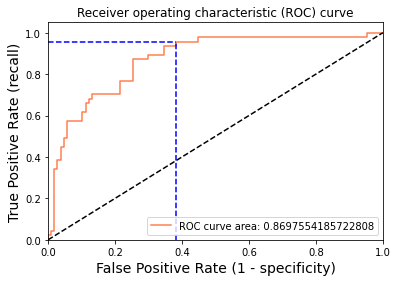

Using a threshold of 0.231 guarantees a sensitivity of 0.957 and a specificity of 0.617, i.e. a false positive rate of 38.32%.


In [181]:
plt.figure()
plt.plot(fpr, tpr, color = 'coral', label = "ROC curve area: " + str(auc(fpr, tpr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color = 'blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +  
      "and a specificity of %.3f" % (1-fpr[idx]) + 
      ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))

다른 툴

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

kNN

In [54]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.70967742 0.70967742 0.77419355 0.67741935 0.62295082 0.68852459
 0.6557377  0.80327869 0.78688525 0.72131148]


71.5

Decision Tree

In [55]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf,x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.80645161 0.62903226 0.77419355 0.67741935 0.68852459 0.70491803
 0.70491803 0.73770492 0.78688525 0.72131148]


72.31

Ramdom Forest

In [56]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf,x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.77419355 0.74193548 0.75806452 0.66129032 0.67213115 0.67213115
 0.68852459 0.72131148 0.73770492 0.72131148]


71.49

Naive Bayes

In [57]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf,x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100, 2)

[0.75806452 0.67741935 0.74193548 0.74193548 0.67213115 0.6557377
 0.73770492 0.85245902 0.7704918  0.80327869]


74.11

In [58]:
clf = GaussianNB()
clf.fit(x_train,y_train)
prediction=clf.predict(x_test)
prediction

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

SVM

In [59]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf,x_train, y_train, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.79032258 0.70967742 0.77419355 0.69354839 0.68852459 0.70491803
 0.63934426 0.85245902 0.85245902 0.80327869]


75.09

In [60]:
clf = SVC()
clf.fit(x_train,y_train)
prediction=clf.predict(x_test)

In [61]:
prediction

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [62]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0],
      dtype=int64)

In [63]:
prediction - y_test

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  1,  0,  0,  0,  0,  0,  0,  1,  0, -1,  1,  0, -1,  0,  0,
        0,  0,  1, -1,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  1,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0, -1,  0, -1,
        0, -1,  0,  0,  0,  1,  0,  0, -1,  0,  0,  0,  0, -1,  0, -1,  0,
        0], dtype=int64)